# Iowa House Price prediction - Advanced Regression Techniques

In [1]:
# importing the necessary modules
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

plt.style.use('seaborn')
warnings.filterwarnings("ignore")
pd.options.display.max_seq_items = 2000
pd.set_option('display.max_columns', 10000)


from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_log_error
from sklearn.linear_model import Ridge, RidgeCV, LassoCV, ElasticNet

In [2]:
# reading the training dataset
data = pd.read_csv('data/train.csv')

### Exploring the data

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### Percentage of the values missing :

In [5]:
null_details = dict(data.isnull().sum().sort_values(ascending=False))
for items in null_details:
    null_details[items] = (null_details[items] / len(data)) * 100
null_details

{'PoolQC': 99.52054794520548,
 'MiscFeature': 96.30136986301369,
 'Alley': 93.76712328767123,
 'Fence': 80.75342465753424,
 'FireplaceQu': 47.26027397260274,
 'LotFrontage': 17.73972602739726,
 'GarageCond': 5.5479452054794525,
 'GarageType': 5.5479452054794525,
 'GarageYrBlt': 5.5479452054794525,
 'GarageFinish': 5.5479452054794525,
 'GarageQual': 5.5479452054794525,
 'BsmtExposure': 2.6027397260273974,
 'BsmtFinType2': 2.6027397260273974,
 'BsmtFinType1': 2.5342465753424657,
 'BsmtCond': 2.5342465753424657,
 'BsmtQual': 2.5342465753424657,
 'MasVnrArea': 0.547945205479452,
 'MasVnrType': 0.547945205479452,
 'Electrical': 0.0684931506849315,
 'Utilities': 0.0,
 'YearRemodAdd': 0.0,
 'MSSubClass': 0.0,
 'Foundation': 0.0,
 'ExterCond': 0.0,
 'ExterQual': 0.0,
 'Exterior2nd': 0.0,
 'Exterior1st': 0.0,
 'RoofMatl': 0.0,
 'RoofStyle': 0.0,
 'YearBuilt': 0.0,
 'LotConfig': 0.0,
 'OverallCond': 0.0,
 'OverallQual': 0.0,
 'HouseStyle': 0.0,
 'BldgType': 0.0,
 'Condition2': 0.0,
 'BsmtFinSF1'

### Data Overview

In [6]:
data_description = open('data/data_description.txt').read()
for item in (data_description.split('\n')):
    print(item)

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [7]:
print ("Rows     : " ,data.shape[0])
print ("Columns  : " ,data.shape[1])
print ("\nFeatures : \n" ,data.columns.tolist())
print ("\nMissing values :  ", data.isnull().sum().values.sum())
print ("\nUnique values :  \n",data.nunique())

Rows     :  1460
Columns  :  81

Features : 
 ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3

In [8]:
# Getting the number of unique elements for each columns
data_dist = pd.DataFrame(data.nunique())

data_dist.columns = ['unique_terms']
data_dist.reset_index(inplace = True)
data_dist.rename(columns = {'index':'column'}, inplace = True)
data_dist

,column,unique_terms
0,Id,1460
1,MSSubClass,15
2,MSZoning,5
3,LotFrontage,110
4,LotArea,1073
5,Street,2
6,Alley,2
7,LotShape,4
8,LandContour,4
9,Utilities,2


#### Dividing categorical and the continuous variables

In [9]:
continuous_column = []
categorical_column = []

for index, row in data_dist.iterrows():
    if (row['unique_terms']) <= 16:
        categorical_column.append(data_dist['column'].iloc[index])
    else:
        continuous_column.append(data_dist['column'].iloc[index])

#### Dropping the ID column

In [10]:
data.drop(columns='Id', inplace=True)

In [11]:
cat_col = pd.DataFrame([len(categorical_column),len(continuous_column)],columns=['count'])
cat_col['type_of_variable'] = ['categorical','continuous']
fig = px.bar(cat_col,x='type_of_variable', y='count')
fig.show()

In [12]:
categorical = data.select_dtypes(include='object')
len(categorical.columns)

43

### The number of categorical features are way more than the continuous variables

##### Looking at the PoolQC variable.

In [13]:
data[data['PoolQC'].isna()==False]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Artery,Norm,1Fam,2Story,8,4,1918,1990,Gable,CompShg,Stucco,Stucco,None,0.0,Gd,Gd,PConc,TA,TA,No,GLQ,1036,LwQ,184,140,1360,GasA,Gd,Y,SBrkr,1360,1360,392,3112,1,1,2,0,4,1,Gd,8,Typ,1,Ex,Detchd,1918.0,Unf,2,795,TA,TA,Y,0,16,552,0,0,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000
810,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1974,1999,Hip,CompShg,HdBoard,HdBoard,BrkFace,99.0,TA,TA,CBlock,TA,TA,No,ALQ,663,LwQ,377,0,1040,GasA,Fa,Y,SBrkr,1309,0,0,1309,1,0,1,1,3,1,Gd,5,Typ,1,Fa,Attchd,1974.0,RFn,2,484,TA,TA,Y,265,0,0,0,0,648,Fa,GdPrv,NaN,0,1,2006,WD,Normal,181000
1170,80,RL,76.0,9880,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,6,6,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,Av,ALQ,522,Unf,0,574,1096,GasA,TA,Y,SBrkr,1118,0,0,1118,1,0,1,0,3,1,TA,6,Typ,1,Po,Attchd,1977.0,Fin,1,358,TA,TA,Y,203,0,0,0,0,576,Gd,GdPrv,NaN,0,7,2008,WD,Normal,171000
1182,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096,Unf,0,300,2396,GasA,Ex,Y,SBrkr,2411,2065,0,4476,1,0,3,1,4,1,Ex,10,Typ,2,TA,Attchd,1996.0,Fin,3,813,TA,TA,Y,171,78,0,0,0,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1298,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
1386,60,RL,80.0,16692,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,RRAn,Norm,1Fam,2Story,7,5,1978,1978,Gable,CompShg,Plywood,Plywood,BrkFace,184.0,TA,TA,CBlock,Gd,TA,No,BLQ,790,LwQ,469,133,1392,GasA,TA,Y,SBrkr,1392,1392,0,2784,1,0,3,1,5,1,Gd,12,Typ,2,TA,Attchd,1978.0,RFn,2,564,TA,TA,Y,0,112,0,0,440,519,Fa,MnPrv,TenC,2000,7,2006,WD,Normal,250000
1423,80,RL,NaN,19690,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,Norm,1Fam,SLvl,6,7,1966,1966,Flat,Tar&Grv,Plywood,Plywood,None,0.0,Gd,Gd,CBlock,Gd,TA,Av,Unf,0,Unf,0,697,697,GasA,TA,Y,SBrkr,1575,626,0,2201,0,0,2,0,4,1,Gd,8,Typ,1,Gd,Attchd,1966.0,Unf,2,432,Gd,Gd,Y,586,236,0,0,0,738,Gd,GdPrv,NaN,0,8,2006,WD,Alloca,274970


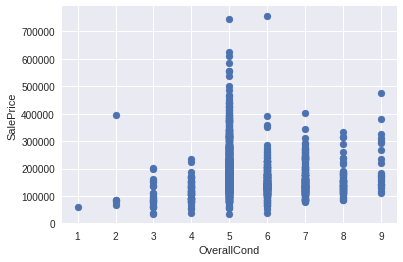

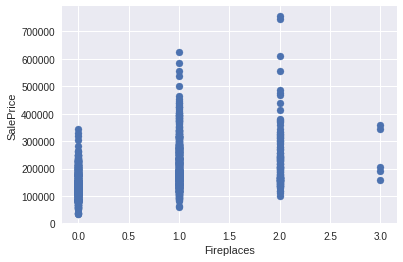

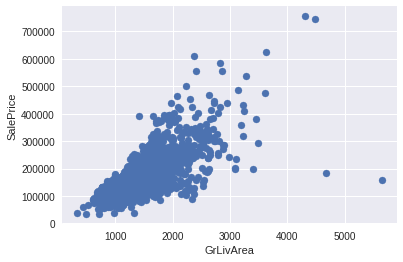

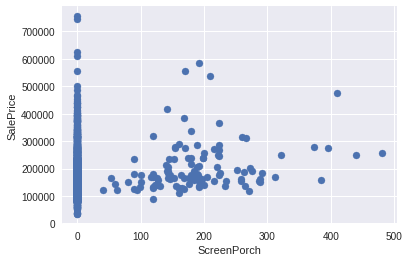

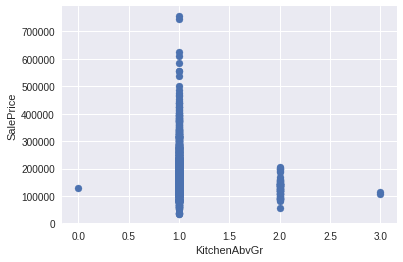

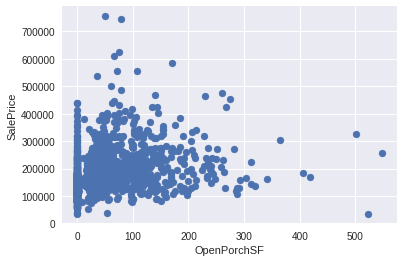

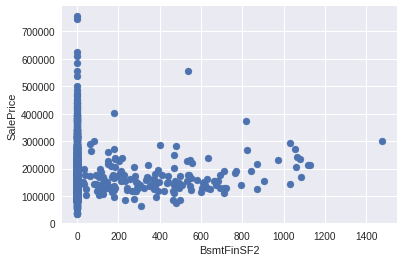

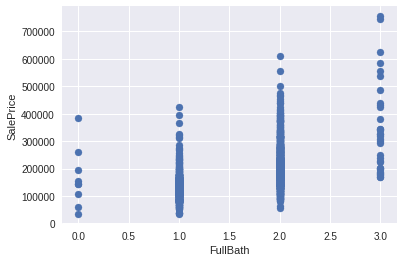

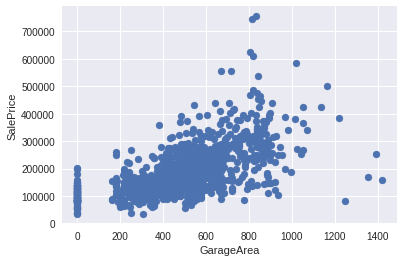

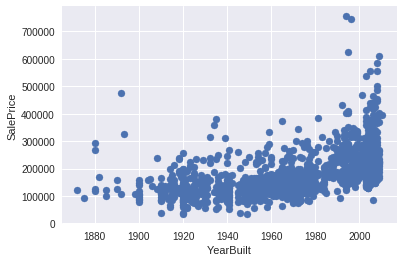

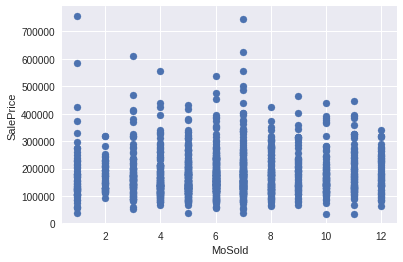

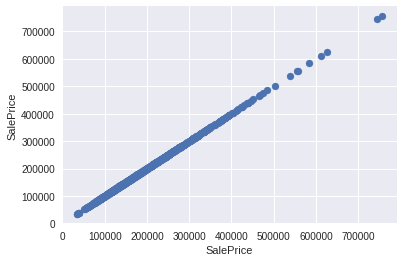

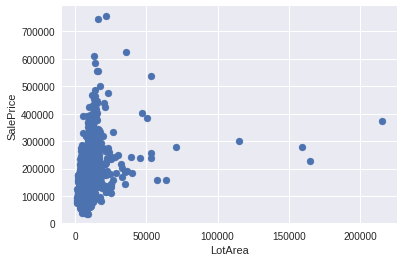

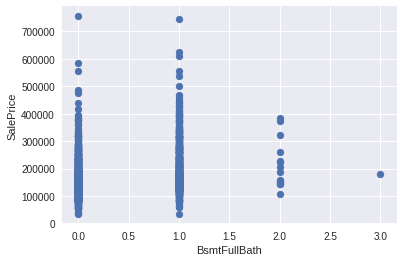

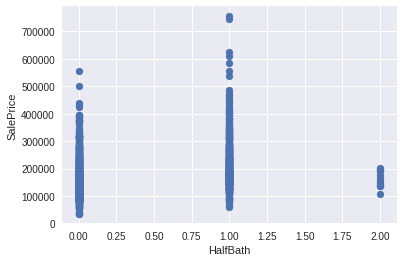

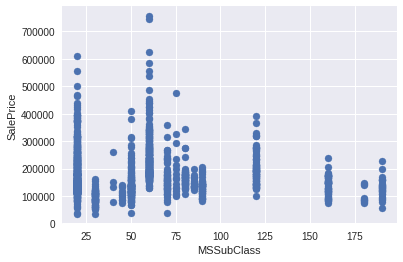

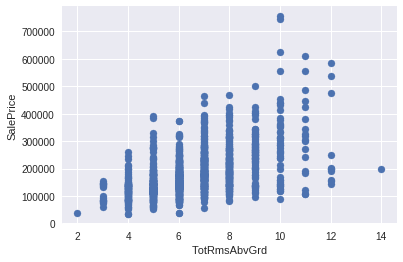

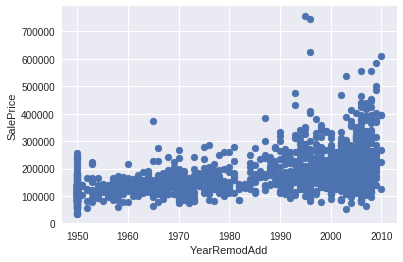

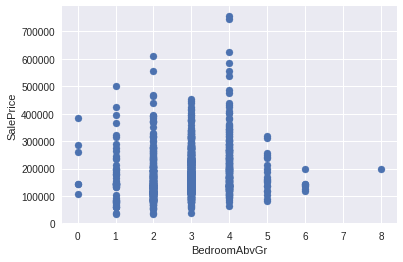

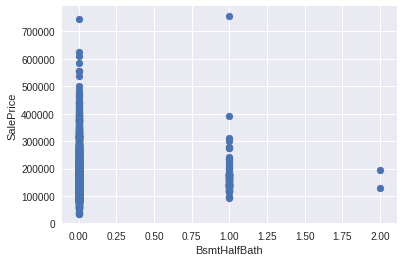

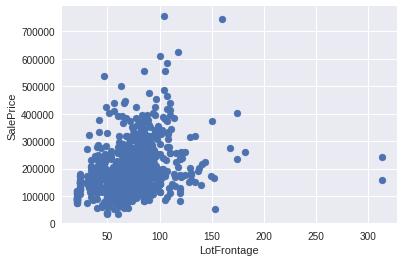

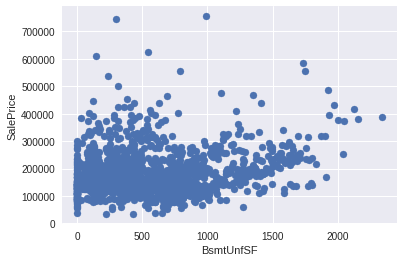

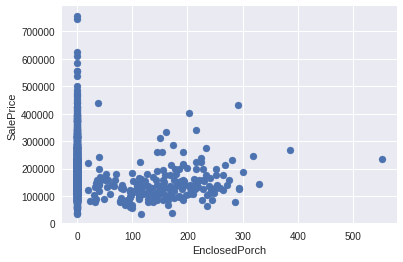

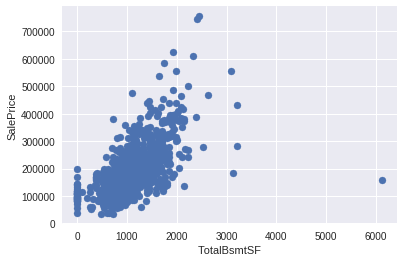

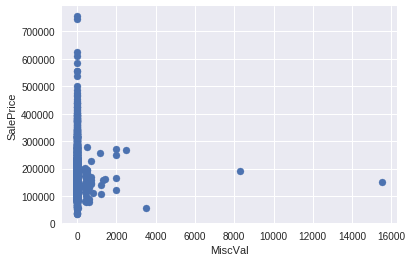

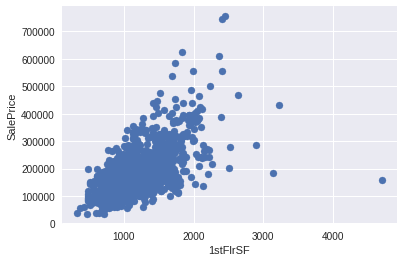

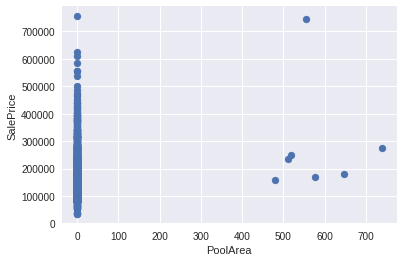

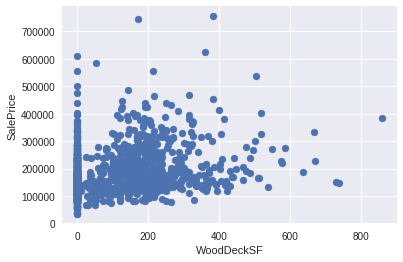

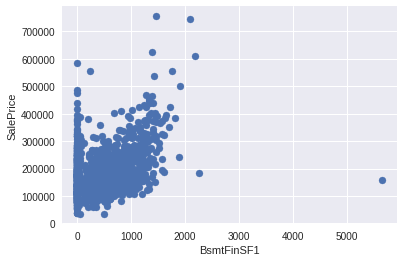

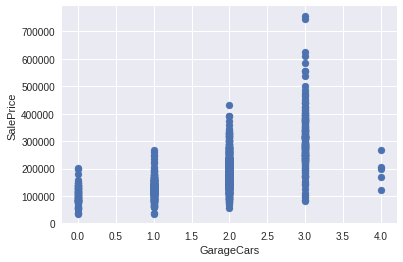

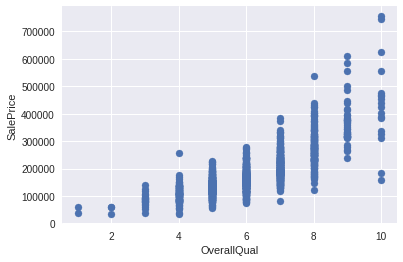

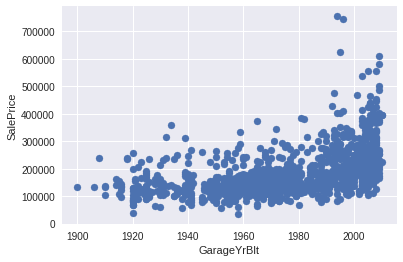

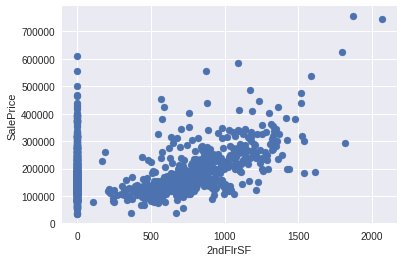

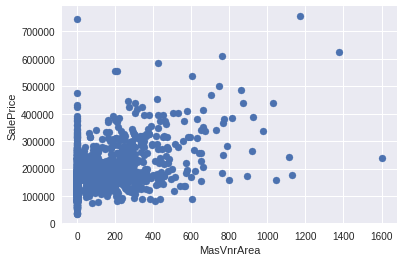

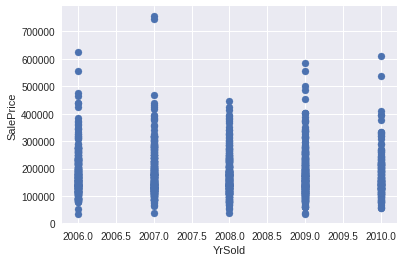

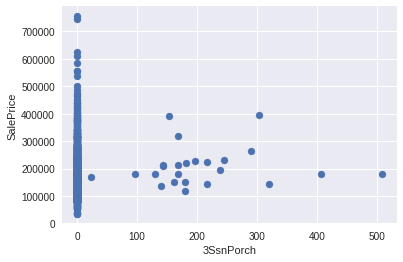

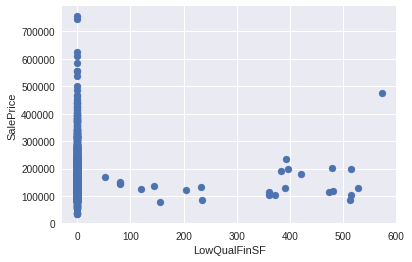

In [14]:
for each in (set(data.columns)-set(categorical.columns)):
    plt.scatter(data[each],data['SalePrice'])
    plt.xlabel(each)
    plt.ylabel('SalePrice')
    plt.show()

In [15]:
data.corrwith(data['SalePrice'])

MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
dtype: float64

In [16]:
data.corr()['SalePrice']

MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePrice, dtype: float64

#### Filling with NaN values in the column with the 'Other' data

In [17]:
cat_ft =['MiscFeature','Alley','Fence','FireplaceQu','GarageCond','GarageType','GarageFinish','GarageQual',
        'BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual','MasVnrType','Electrical','PoolQC']

for ft in cat_ft:
    data[ft].fillna('Other',inplace=True)

In [18]:
data['GarageYrBlt'].fillna(0,inplace=True)
data['MasVnrArea'].fillna(0,inplace=True)
data['LotFrontage']= data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

#### Rechecking if we have any other missing values present

In [19]:
data.isna().sum().sort_values(ascending=False)

SalePrice        0
SaleCondition    0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
                ..
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
MSSubClass       0
Length: 80, dtype: int64

In [20]:
object_features = data.select_dtypes(include='object').columns
object_features

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [21]:
def dummies(data):
    dummies_df = pd.DataFrame()
    object_features= data.select_dtypes(include='object').columns
    for name in object_features:
        dummies = pd.get_dummies(data[name],drop_first=False)
        dummies =dummies.add_prefix("{}_".format(name))
        dummies_df=pd.concat([dummies_df,dummies],axis=1)
    return dummies_df

data_dummy = dummies(data)
print(data_dummy.columns)
print(data_dummy.shape)

Index(['MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Street_Grvl', 'Street_Pave', 'Alley_Grvl',
       'Alley_Other', 'Alley_Pave', 'LotShape_IR1', 'LotShape_IR2',
       'LotShape_IR3', 'LotShape_Reg', 'LandContour_Bnk', 'LandContour_HLS',
       'LandContour_Low', 'LandContour_Lvl', 'Utilities_AllPub',
       'Utilities_NoSeWa', 'LotConfig_Corner', 'LotConfig_CulDSac',
       'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Gtl',
       'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blmngtn',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTow

In [22]:
data=data.drop(columns=object_features,axis=1)
print(data.columns)

final_data = pd.concat([data,data_dummy],axis=1)
final_data.shape

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


(1460, 305)

In [23]:
final_data.isna().sum()

MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 305, dtype: int64

#### Test/Train Split

In [24]:
train_data = final_data.iloc[:1400,:]
#val_data = final_data.iloc[1000:1450,:]
test_data = final_data.iloc[1400:,:]

print(train_data.shape)
#print(val_data.shape)
print(test_data.shape)

# Splitting into X and y for training purpose
X = train_data[train_data.columns.difference(['SalePrice'])]
print(len(X.columns))
y = np.log(train_data.loc[:,'SalePrice'])

# Splitting into X_test and y_test for testing purpose
X_test = test_data[test_data.columns.difference(['SalePrice'])]
y_test = np.log(test_data.loc[:,'SalePrice'])

(1400, 305)
(60, 305)
304


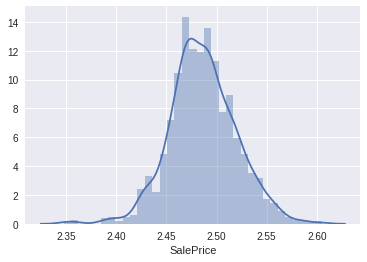

In [25]:
sns.distplot(np.log(y))

#### Fitting a standard OLS method

In [26]:
import statsmodels.api as sm

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X_test) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     78.13
Date:                Tue, 03 Sep 2019   Prob (F-statistic):               0.00
Time:                        12:42:56   Log-Likelihood:                 1326.1
No. Observations:                1400   AIC:                            -2144.
Df Residuals:                    1146   BIC:                            -812.2
Df Model:                         253                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
1stFlrSF               7.066e-05   2.99e-05      2.361      0.018    1.19e-05       0.000
2ndFlrSF               5.494e-05   2.61e-05      2.105      0.035    3.73e-06       0.000
3SsnPorch                 0.0001      0.000      1.113      0.266   -9.12e-05       0.000
Alley_Grvl                0.3246      0.193      1.678      0.094      -0.055       0.704
Alley_Other               0.3020      0.193      1.566      0.118      -0.076       0.680
Alley_Pave                0.3210      0.193      1.659      0.097      -0.059       0.701
BedroomAbvGr              0.0060      0.006      0.938      0.349      -0.007       0.019
BldgType_1Fam             0.2026      0.120      1.692      0.091      -0.032       0.438
BldgType_2fmCon           0.2321      0.120      1.938      0.053      -0.003       0.467
BldgType_Duplex           0.1881      0.118      1.593      0.111      -0.044       0.420
BldgType_Twnhs            0.1429      0.118      1.208      0.227      -0.089       0.375
BldgType_TwnhsE           0.1818      0.118      1.544      0.123      -0.049       0.413
BsmtCond_Fa               0.0966      0.123      0.788      0.431      -0.144       0.337
BsmtCond_Gd               0.1249      0.122      1.025      0.306      -0.114       0.364
BsmtCond_Other            0.2003      0.116      1.731      0.084      -0.027       0.427
BsmtCond_Po               0.4043      0.161      2.508      0.012       0.088       0.721
BsmtCond_TA               0.1215      0.123      0.989      0.323      -0.120       0.363
BsmtExposure_Av           0.1979      0.119      1.668      0.096      -0.035       0.431
BsmtExposure_Gd           0.2280      0.118      1.929      0.054      -0.004       0.460
BsmtExposure_Mn           0.1908      0.119      1.608      0.108      -0.042       0.424
BsmtExposure_No           0.1865      0.119      1.570      0.117      -0.047       0.420
BsmtExposure_Other        0.1443      0.141      1.025      0.305      -0.132       0.421
BsmtFinSF1              5.06e-05   1.38e-05      3.677      0.000    2.36e-05    7.76e-05
BsmtFinSF2             4.868e-05   2.87e-05      1.693      0.091   -7.72e-06       0.000
BsmtFinType1_ALQ          0.1305      0.079      1.649      0.099      -0.025       0.286
BsmtFinType1_BLQ          0.1299      0.080      1.627      0.104      -0.027       0.286
BsmtFinType1_GLQ          0.1420      0.080      1.774      0.076      -0.015       0.299
BsmtFinType1_LwQ          0.1034      0.080      1.291      0.197      -0.054       0.261
BsmtFinType1_Other        0.2003      0.116      1.731      0.084      -0.027       0.427
BsmtFinType1_Rec          0.1215      0.079      1.530      0.126      -0.034       0.277
BsmtFinType1_Unf          0.1199      0.079      1.509      0.132      -0.036       0.276
BsmtFinType2_ALQ       

In [27]:
np.sqrt(mean_squared_log_error(y_test, predictions))

0.010409866819542958

#### Advanced techniques for tuning <br>
#### The scores mentioned are the R-Square values

In [28]:
#LassoCV
model_las_cv = LassoCV(alphas=(0.0001, 0.0005, 0.001, 0.01, 0.05, 0.1, 0.3, 1, 3, 5, 10))
k_fold = KFold(5)
for k, (train, test) in enumerate(k_fold.split(X, y)):
    model_las_cv.fit(X.loc[train], y.loc[train])
    print("[fold {0}] alpha: {1:.5f}, score: {2:.5f}".
          format(k, model_las_cv.alpha_, model_las_cv.score(X.loc[test], y.loc[test])))

[fold 0] alpha: 0.00050, score: 0.92373
[fold 1] alpha: 0.00050, score: 0.87427
[fold 2] alpha: 0.00050, score: 0.89751
[fold 3] alpha: 0.00100, score: 0.90459
[fold 4] alpha: 0.00100, score: 0.76139


In [29]:
model_las_cv.score(X,y)

0.8929310356760798

In [30]:
predictions = model_las_cv.predict(X_test)
np.sqrt(mean_squared_log_error(y_test, predictions))

0.010098645210669555

In [31]:
X.columns[model_las_cv.coef_ <0]   # We can figure out which factors positively/negatively or do not affect the saleprice

Index(['Alley_Other', 'BedroomAbvGr', 'BldgType_Twnhs', 'BsmtExposure_No',
       'BsmtFinType1_Unf', 'BsmtQual_TA', 'CentralAir_N', 'Condition2_PosN',
       'Exterior1st_HdBoard', 'Exterior1st_Wd Sdng', 'Exterior2nd_CmentBd',
       'FireplaceQu_Other', 'Foundation_CBlock', 'GarageFinish_Unf',
       'GrLivArea', 'HeatingQC_TA', 'HouseStyle_1Story', 'HouseStyle_2Story',
       'KitchenAbvGr', 'LotConfig_Inside', 'LotShape_IR1', 'MSSubClass',
       'MSZoning_C (all)', 'MSZoning_RM', 'MiscVal', 'MoSold',
       'Neighborhood_Edwards', 'OpenPorchSF', 'PavedDrive_N', 'PoolArea',
       'SaleCondition_Abnorml', 'SaleType_WD', 'TotalBsmtSF', 'YrSold'],
      dtype='object')

In [32]:
#RidgeCV
model_ridge_cv = RidgeCV(alphas=(0.01, 0.05, 0.1, 0.3, 1, 3, 5, 10))
k_fold = KFold(5)
for k, (train, test) in enumerate(k_fold.split(X, y)):
    model_ridge_cv.fit(X.loc[train], y.loc[train])
    print("[fold {0}] alpha: {1:.5f}, score: {2:.5f}".
          format(k, model_ridge_cv.alpha_, model_ridge_cv.score(X.loc[test], y.loc[test])))

[fold 0] alpha: 10.00000, score: 0.90642
[fold 1] alpha: 10.00000, score: 0.87697
[fold 2] alpha: 10.00000, score: 0.89890
[fold 3] alpha: 10.00000, score: 0.90192
[fold 4] alpha: 10.00000, score: 0.78264


In [33]:
model_ridge_cv.score(X,y)

0.9052452422499678

In [34]:
model_ridge_cv.score(X_test,y_test)

0.8672488606505202

In [35]:
predictions = model_ridge_cv.predict(X_test)
np.sqrt(mean_squared_log_error( y_test, predictions ))

0.010247344029201643

In [36]:
model_en = ElasticNet(random_state=1, alpha=0.00065, max_iter=3000)
model_en.fit(X, y)
predictions = model_en.predict(X_test)
np.sqrt(mean_squared_log_error(y_test, predictions))

0.01087885694984249